In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import geopy
import geocoder
from geopy.geocoders import Nominatim
from datetime import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv',index_col = 0)
df['Hour'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')).astype('int64')
df['Month'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%m')).astype('int64')
df['Date'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y'))
df['Day'] = df['Date'].apply(lambda x : list(map(int,x.split('-')))).apply(lambda x : date(x[2],x[1],x[0]).weekday())
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Coordinates',axis = 1)

In [3]:
cities = list(set(list(df.City)))
len(cities)

119

In [4]:
locator = Nominatim(user_agent="nielsen",timeout = 100)

coord = {}
for i,city in enumerate(cities):
    lc = locator.geocode(city)
    try:
        print(str(i+1)+'.'+ city + ' SUCCESS!')
        coord[city] = [lc.latitude,lc.longitude]
    except AttributeError:
        print(str(i+1)+'.'+city + ' DATA not available')

print(len(coord))   
coord

1.Mumbai SUCCESS!
2.Gwalior SUCCESS!
3.Kozhikode SUCCESS!
4.Satna SUCCESS!
5.Palwal SUCCESS!
6.Sagar SUCCESS!
7.Siliguri SUCCESS!
8.Mysuru SUCCESS!
9.Paravattani SUCCESS!
10.Bhopal SUCCESS!
11.Fatehabad SUCCESS!
12.Yamunanagar SUCCESS!
13.Chandrapur SUCCESS!
14.Bagalkot SUCCESS!
15.Kochi SUCCESS!
16.Solapur SUCCESS!
17.Kalyan SUCCESS!
18.Kalaburgi SUCCESS!
19.Nashik SUCCESS!
20.Bengaluru SUCCESS!
21.Meerut SUCCESS!
22.Kolkata SUCCESS!
23.Ajmer SUCCESS!
24.Nandesari SUCCESS!
25.Kollam SUCCESS!
26.Bathinda SUCCESS!
27.Ramanagara SUCCESS!
28.Kota SUCCESS!
29.Kohima SUCCESS!
30.Kurukshetra SUCCESS!
31.Hisar SUCCESS!
32.Chandigarh SUCCESS!
33.Talcher SUCCESS!
34.Amritsar SUCCESS!
35.Tirupati SUCCESS!
36.Maihar SUCCESS!
37.Kanpur SUCCESS!
38.Delhi SUCCESS!
39.Gurugram SUCCESS!
40.Udaipur SUCCESS!
41.Howrah SUCCESS!
42.Damoh SUCCESS!
43.Moradabad SUCCESS!
44.Ahmedabad SUCCESS!
45.Rohtak SUCCESS!
46.Jaipur SUCCESS!
47.Ghaziabad SUCCESS!
48.Baghpat SUCCESS!
49.Chikkaballapur SUCCESS!
50.Faridab

{'Mumbai': [18.9387711, 72.8353355],
 'Gwalior': [26.2037247, 78.1573628],
 'Kozhikode': [11.2586082, 75.7788735],
 'Satna': [24.5, 81.0],
 'Palwal': [28.12502575, 77.35831300773046],
 'Sagar': [23.80961225, 78.75911360578634],
 'Siliguri': [26.7164127, 88.4309916],
 'Mysuru': [12.3051828, 76.6553609],
 'Paravattani': [10.5190245, 76.241875],
 'Bhopal': [23.2584857, 77.401989],
 'Fatehabad': [27.02766825, 78.2074341134146],
 'Yamunanagar': [30.2112003, 77.28638972360895],
 'Chandrapur': [26.21231825, 91.89620684881584],
 'Bagalkot': [16.1853166, 75.6967919],
 'Kochi': [9.931308, 76.2674136],
 'Solapur': [17.84990665, 75.27632027348457],
 'Kalyan': [19.2716301, 73.23586552517415],
 'Kalaburgi': [15.1226488, 77.6341981],
 'Nashik': [20.0112475, 73.7902364],
 'Bengaluru': [12.9791198, 77.5912997],
 'Meerut': [28.916667, 77.683333],
 'Kolkata': [22.54541245, 88.3567751581234],
 'Ajmer': [26.4691, 74.639],
 'Nandesari': [22.4178037, 73.0949186],
 'Kollam': [8.8879509, 76.5955013],
 'Bathind

In [5]:
df['Coordinates'] = df.City.map(coord)

In [6]:
cols = ['City','Coordinates','Time','Month','Hour','Date','Day','CO_min','CO_avg','CO_max']
df_1 = df[cols].copy()
df_1

,City,Coordinates,Time,Month,Hour,Date,Day,CO_min,CO_avg,CO_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,19.000000,22.000000,74.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,16.000000,19.000000,44.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,10.000000,37.000000,77.000000
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,24.000000,42.000000,82.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,15.000000,26.000000,40.000000
...,...,...,...,...,...,...,...,...,...,...
32426,Vijayapura,"[16.666667, 75.916667]",2020-10-21 22:00:00,10,22,21-10-2020,2,32.000000,52.000000,66.000000
32427,Visakhapatnam,"[17.7231276, 83.3012842]",2020-10-21 22:00:00,10,22,21-10-2020,2,6.000000,24.000000,44.000000
32428,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-10-21 22:00:00,10,22,21-10-2020,2,17.000000,46.000000,98.000000
32429,Kolkata,"[22.54541245, 88.3567751581234]",2020-10-21 22:00:00,10,22,21-10-2020,2,12.333333,17.833333,24.666667


### Taking average for all cities over the period of data collection

In [7]:
df_1 = df_1[(df_1.Hour >= 7) & (df_1.Hour <= 22)]
df_1.head()

,City,Coordinates,Time,Month,Hour,Date,Day,CO_min,CO_avg,CO_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,19.0,22.0,74.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,16.0,19.0,44.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,10.0,37.0,77.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,24.0,42.0,82.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,15.0,26.0,40.0


In [8]:
cities = sorted(list(set(df_1.City.to_list())))
print(len(cities))

119


In [9]:
list_dict = []
# 
for city in cities:
    dict_CO = {}
    dict_CO['City'] = city
    dict_CO['Max'] = df_1.loc[df_1.City == city]['CO_max'].mean()
    dict_CO['Avg'] = df_1.loc[df_1.City == city]['CO_avg'].mean()
    dict_CO['Min'] = df_1.loc[df_1.City == city]['CO_min'].mean()
    dict_CO['Coordinates'] = df_1.loc[df_1.City == city]['Coordinates'].values[0]
    list_dict.append(dict_CO)
list_dict

[{'City': 'Agra',
  'Max': 95.69266055045871,
  'Avg': 44.10550458715596,
  'Min': 12.211009174311927,
  'Coordinates': [27.1752554, 78.0098161]},
 {'City': 'Ahmedabad',
  'Max': 104.6377358490566,
  'Avg': 37.31320754716981,
  'Min': 8.879245283018868,
  'Coordinates': [23.0216238, 72.5797068]},
 {'City': 'Ajmer',
  'Max': 94.4734693877551,
  'Avg': 40.64081632653061,
  'Min': 21.775510204081634,
  'Coordinates': [26.4691, 74.639]},
 {'City': 'Alwar',
  'Max': 88.72830188679245,
  'Avg': 39.86037735849057,
  'Min': 12.120754716981132,
  'Coordinates': [27.639077049999997, 76.6144524902045]},
 {'City': 'Amaravati',
  'Max': 50.905660377358494,
  'Avg': 31.12452830188679,
  'Min': 15.69433962264151,
  'Coordinates': [16.4998534, 81.3300812]},
 {'City': 'Ambala',
  'Max': 17.683018867924527,
  'Avg': 14.943396226415095,
  'Min': 12.249056603773585,
  'Coordinates': [30.3843674, 76.770421]},
 {'City': 'Amritsar',
  'Max': 27.637096774193548,
  'Avg': 16.31451612903226,
  'Min': 7.21774193

In [10]:
df_avg = pd.DataFrame(list_dict)
df_avg = df_avg.round(2)
df_avg.head()

,City,Max,Avg,Min,Coordinates
0,Agra,95.69,44.11,12.21,"[27.1752554, 78.0098161]"
1,Ahmedabad,104.64,37.31,8.88,"[23.0216238, 72.5797068]"
2,Ajmer,94.47,40.64,21.78,"[26.4691, 74.639]"
3,Alwar,88.73,39.86,12.12,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,50.91,31.12,15.69,"[16.4998534, 81.3300812]"


In [11]:
df_avg.describe()

,Max,Avg,Min
count,114.000000,114.000000,114.000000
mean,66.473947,37.743158,21.633333
std,27.479462,20.069598,17.256311
min,6.000000,5.670000,3.090000
25%,46.642500,25.757500,12.227500
50%,64.870000,34.190000,18.350000
75%,86.302500,44.505000,27.125000
max,184.100000,177.290000,161.550000


In [12]:
def Radius(df,val):
    df[val+'_rad'] = np.sqrt(df[val])

In [13]:
def Create_Map():
    m3 = folium.Map(location = [23.2584857, 77.401989],zoom_start = 4.5,prefer_canvas=True)
    folium.TileLayer('Stamen Terrain').add_to(m3)
    folium.TileLayer('Stamen Toner').add_to(m3)
    folium.TileLayer('Stamen Water Color').add_to(m3)
    folium.TileLayer('cartodbpositron').add_to(m3)
    folium.TileLayer('cartodbdark_matter').add_to(m3)
    folium.LayerControl().add_to(m3)
    
    return m3

In [14]:
Radius(df_avg,'Avg')

In [15]:
CO_map = Create_Map()

In [16]:
for city in df_avg.City :
    
    display = city +' '+ str(df_avg.loc[df_avg.City == city ,'Avg'].item())    

    if df_avg.loc[df_avg.City == city ,'Avg'].item() >= 44.50: 
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#FF5733',
                fill_color='#FF5733',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(CO_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 34.19:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EE8C31',
                fill_color='#EE8C31',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(CO_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 25.75:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EEE231',
                fill_color='#EEE231',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(CO_map)
        
    else:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#5FFF33',
                fill_color='#5FFF33',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(CO_map)

In [17]:
CO_map

In [18]:
#CO levels
# excellent = 
# fine = 
# moderate = 
# poor = 

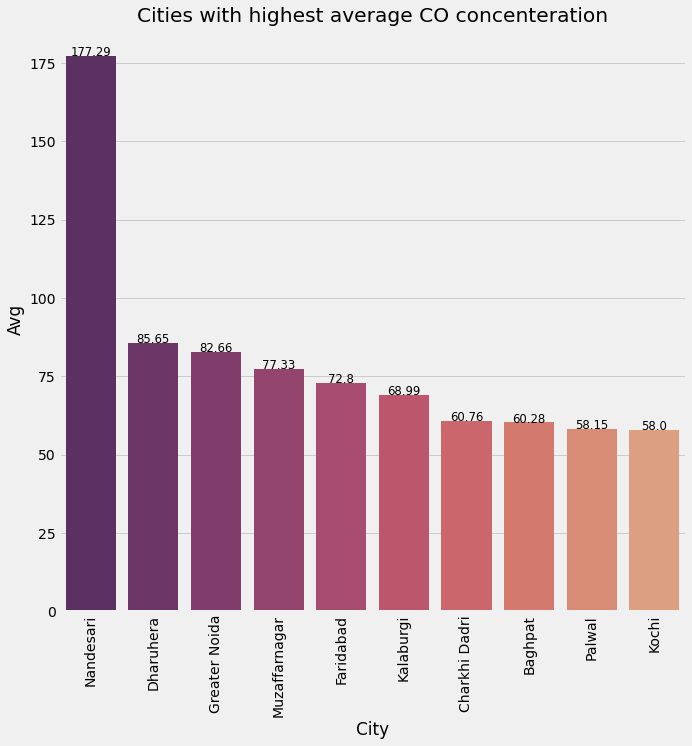

In [19]:
plt.figure(figsize=(10,10))
df_avg_top10 = df_avg.sort_values(by = 'Avg' ,ascending =False).head(10).reset_index()
pal = reversed(sns.color_palette('flare', len(df_avg_top10)))
g=sns.barplot(x='City',y='Avg',data=df_avg_top10, palette=pal)

for index, row in df_avg_top10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with highest average CO concenteration')
plt.xticks(rotation = 90)
plt.show()

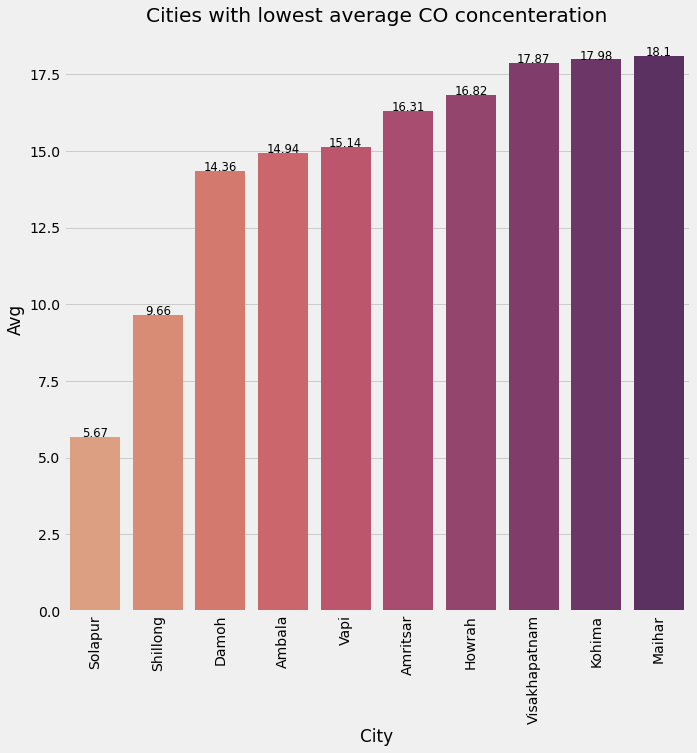

In [20]:
plt.figure(figsize=(10,10))
df_avg_last10 = df_avg.sort_values(by = 'Avg' ,ascending =False).dropna().tail(10).sort_values(by = 'Avg').reset_index()
g=sns.barplot(x='City',y='Avg',data=df_avg_last10, palette='flare')

for index, row in df_avg_last10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with lowest average CO concenteration')
plt.xticks(rotation = 90)
plt.show()

## DELHI

In [21]:
df_2 = df[cols].copy()
delhi = df_2.loc[df_2.City == 'Delhi'].copy()
print(delhi.shape)
delhi = delhi.reset_index(drop = True)
delhi = delhi.round(2)
delhi.head()

(300, 10)


,City,Coordinates,Time,Month,Hour,Date,Day,CO_min,CO_avg,CO_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,25.53,36.06,67.61
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,24.81,34.47,69.36
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,25.69,36.03,69.97
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,26.19,44.25,72.17
4,Delhi,"[28.6273928, 77.1716954]",2020-09-23 04:00:00,9,4,23-09-2020,2,22.51,49.91,70.66


In [22]:
delhi.describe()

,Month,Hour,Day,CO_min,CO_avg,CO_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,27.702767,57.716233,95.979933
std,0.370287,5.458002,1.871871,4.679705,15.133505,17.745994
min,9.000000,0.000000,0.000000,17.250000,33.030000,60.140000
25%,10.000000,9.000000,1.000000,24.200000,46.560000,83.160000
50%,10.000000,13.000000,2.000000,26.650000,56.295000,94.500000
75%,10.000000,17.000000,4.000000,30.422500,64.172500,109.530000
max,10.000000,23.000000,6.000000,39.180000,109.060000,129.030000


### Taking only the time from 7 am to 10 pm

(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='CO_avg'>

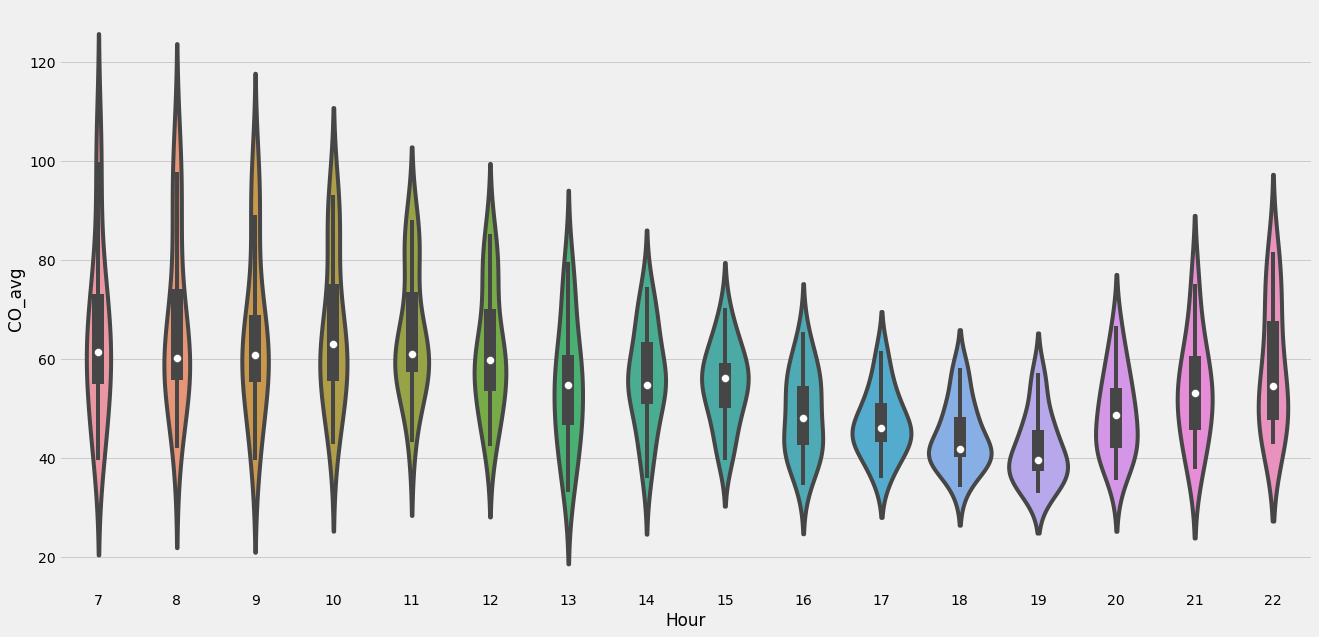

In [23]:
delhi = delhi[(delhi.Hour >= 7) & (delhi.Hour <= 22)]
print(delhi.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'CO_avg',x = 'Hour',data = delhi)

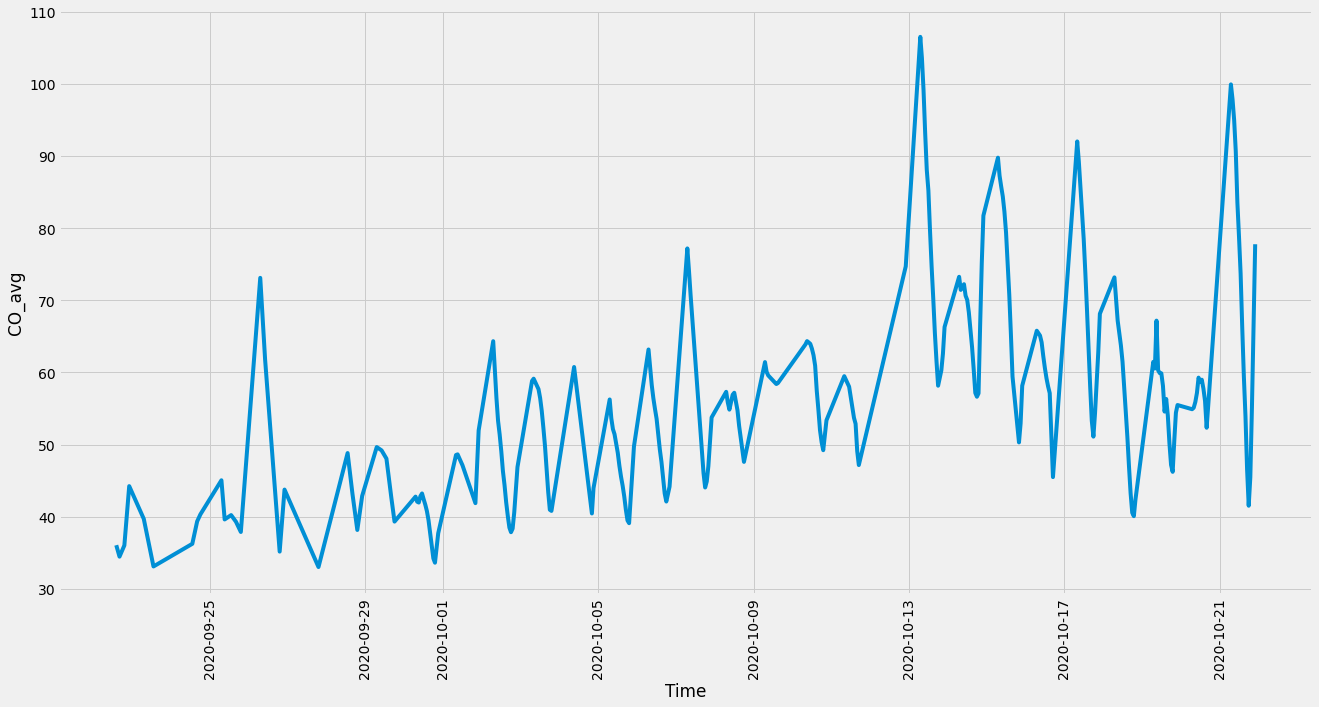

In [24]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'CO_avg',x = 'Time',data = delhi,)
plt.xticks(rotation = 90)
plt.show()

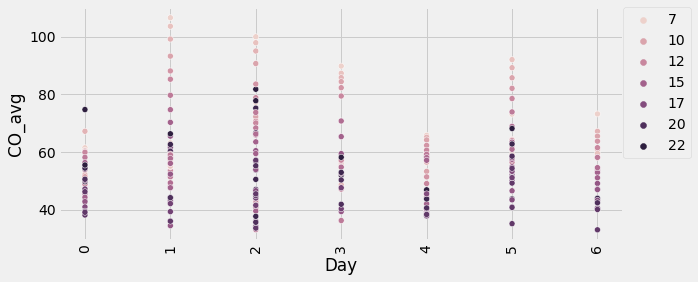

In [25]:
plt.figure(figsize = (9,4))
sns.scatterplot(y = 'CO_avg',x = 'Day',hue = 'Hour',data = delhi) #color = ('#41cb89')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

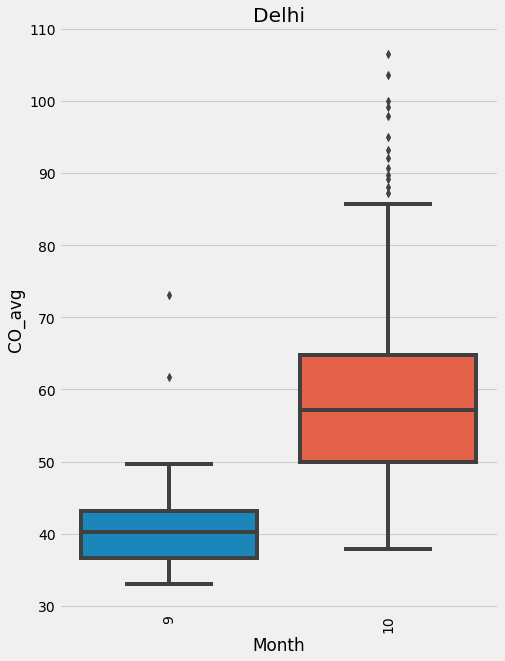

In [26]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'CO_avg',x = 'Month',data = delhi)
plt.title('Delhi')
plt.xticks(rotation = 90)
plt.show()

In [27]:
delhi_sep = delhi[delhi.Month == 9].copy()
delhi_oct = delhi[delhi.Month == 10].copy()

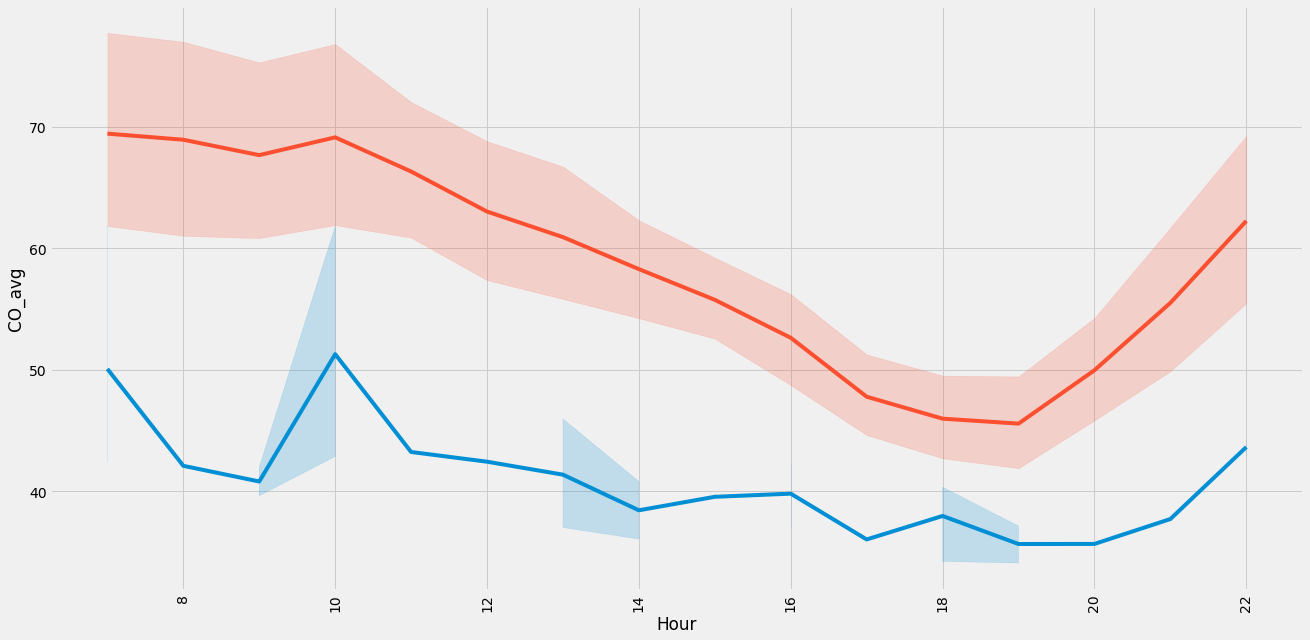

In [28]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'CO_avg',x = 'Hour',data = delhi_sep)
sns.lineplot(y = 'CO_avg',x = 'Hour',data = delhi_oct)
plt.xticks(rotation = 90)
plt.show()

## Mumbai

In [29]:
mum = df_2.loc[df_2.City == 'Mumbai'].copy()
mum = mum.reset_index(drop = True)
mum = mum.round(2)
mum.head()

,City,Coordinates,Time,Month,Hour,Date,Day,CO_min,CO_avg,CO_max
0,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 14:00:00,9,14,22-09-2020,1,22.89,39.33,50.56
1,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 16:00:00,9,16,22-09-2020,1,26.00,39.78,50.67
2,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 19:00:00,9,19,22-09-2020,1,25.33,36.11,50.67
3,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 22:00:00,9,22,22-09-2020,1,23.89,31.56,49.22
4,Mumbai,"[18.9387711, 72.8353355]",2020-09-23 04:00:00,9,4,23-09-2020,2,19.78,24.44,45.89


In [30]:
mum.describe()

,Month,Hour,Day,CO_min,CO_avg,CO_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,28.623033,38.478233,51.744433
std,0.370287,5.458002,1.871871,9.883644,9.721746,8.851651
min,9.000000,0.000000,0.000000,14.670000,18.560000,28.890000
25%,10.000000,9.000000,1.000000,18.000000,30.950000,44.692500
50%,10.000000,13.000000,2.000000,32.890000,38.615000,50.280000
75%,10.000000,17.000000,4.000000,37.900000,46.700000,58.685000
max,10.000000,23.000000,6.000000,44.500000,55.890000,73.220000


(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='CO_avg'>

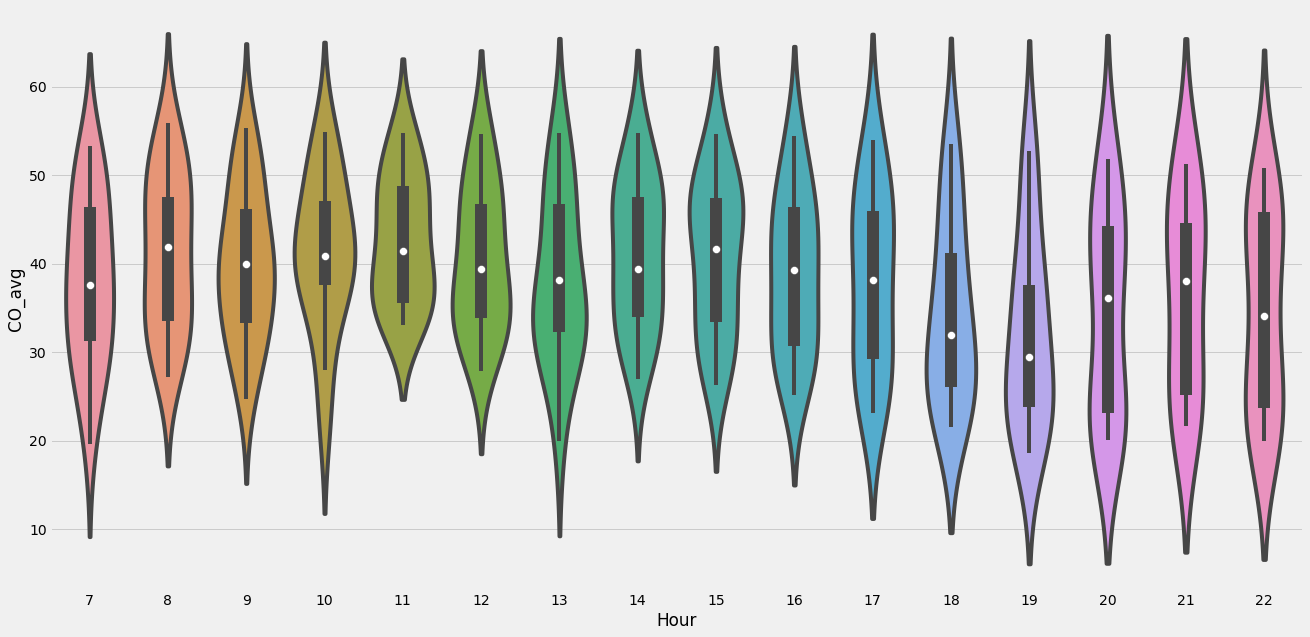

In [31]:
mum = mum[(mum.Hour >= 7) & (mum.Hour <= 22)]
print(mum.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'CO_avg',x = 'Hour',data = mum)

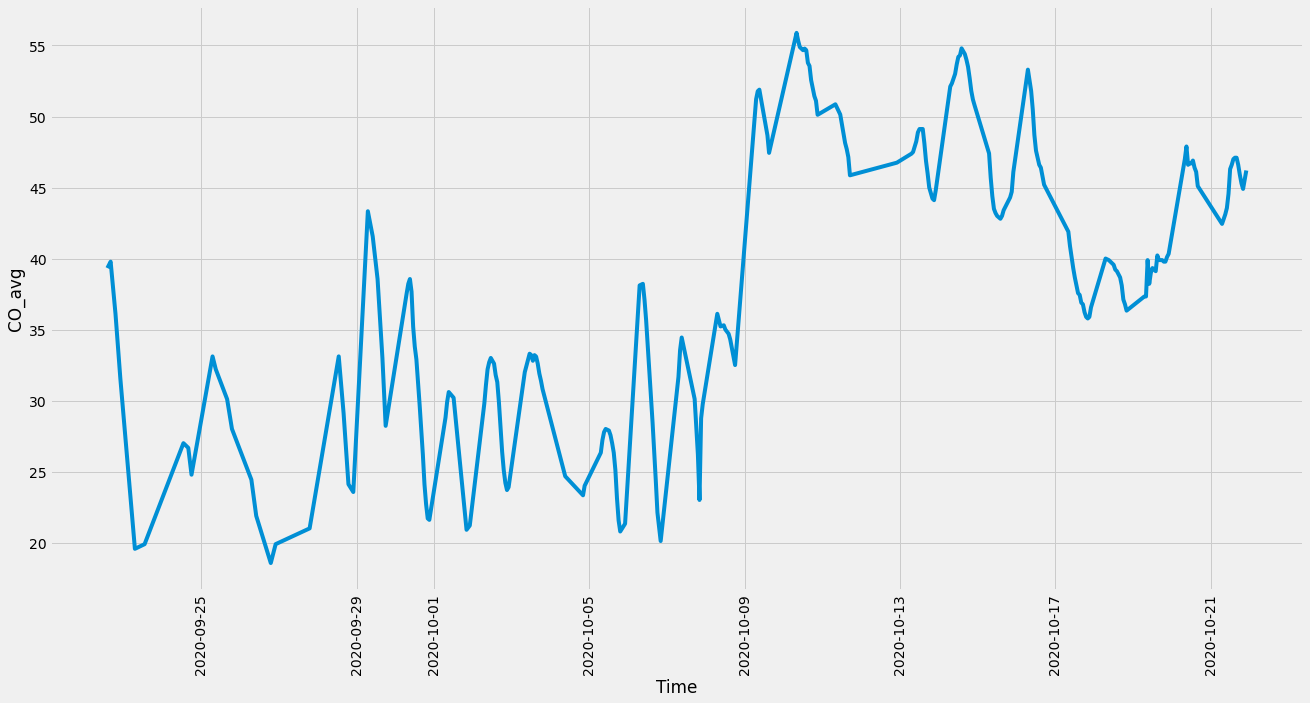

In [32]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'CO_avg',x = 'Time',data = mum)
plt.xticks(rotation = 90)
plt.show()

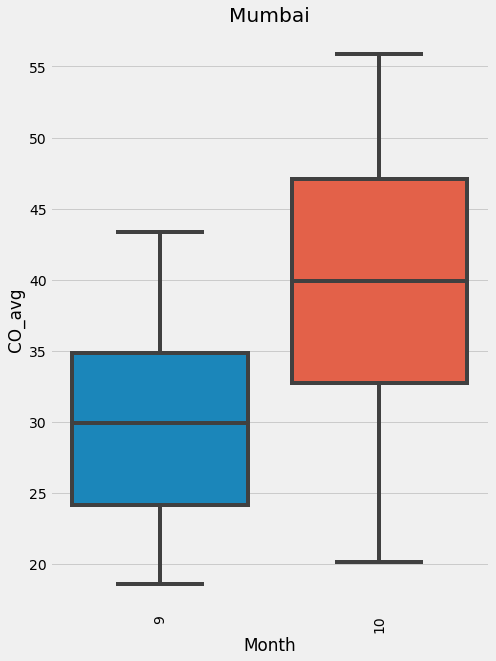

In [33]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'CO_avg',x = 'Month',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

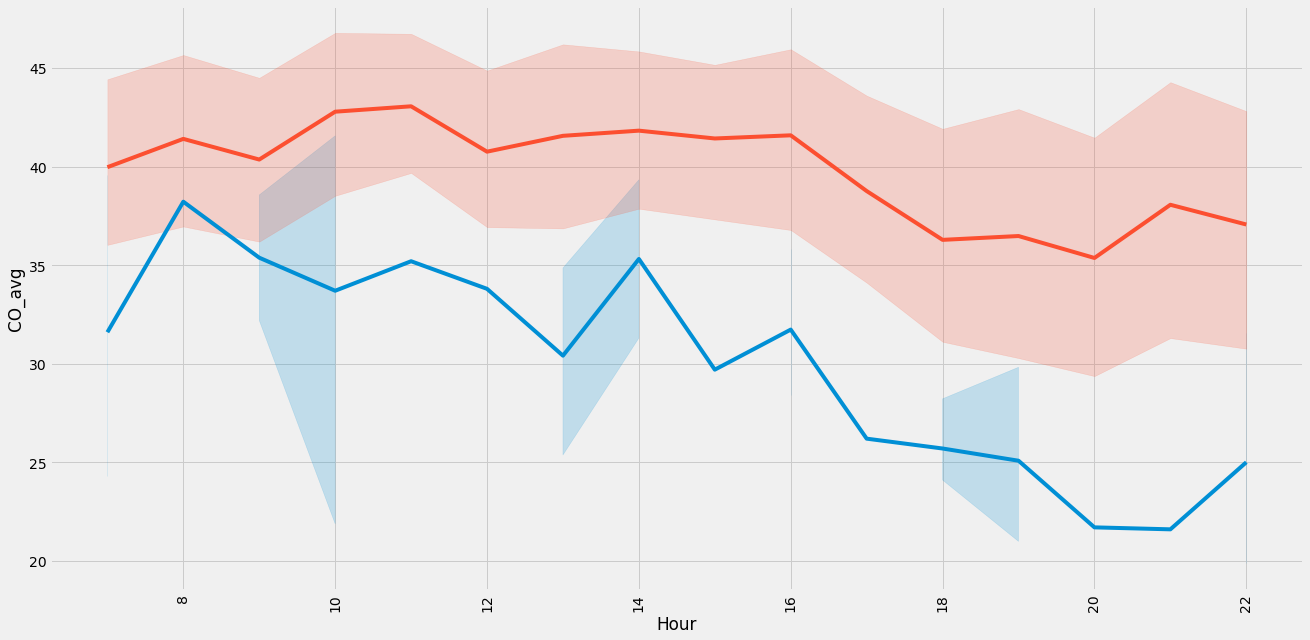

In [34]:
mum_sep = mum[mum.Month == 9].copy()
mum_oct = mum[mum.Month == 10].copy()
plt.figure(figsize = (20,10))
sns.lineplot(y = 'CO_avg',x = 'Hour',data = mum_sep)
sns.lineplot(y = 'CO_avg',x = 'Hour',data = mum_oct)
plt.xticks(rotation = 90)
plt.show()